In [1]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [2]:
x  = "/kaggle/input/face-mask-dataset/data"
path = Path(x)
path.ls()

[PosixPath('/kaggle/input/face-mask-dataset/data/with_mask'),
 PosixPath('/kaggle/input/face-mask-dataset/data/without_mask')]

In [3]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

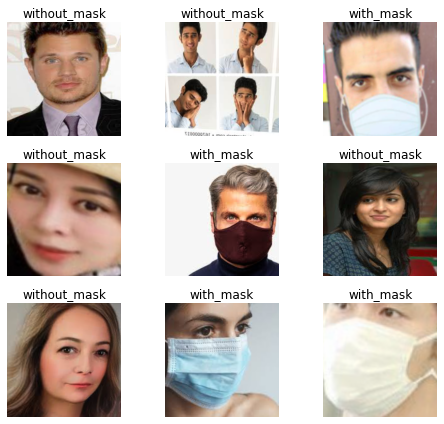

In [4]:
data.show_batch(rows=3, figsize=(7,6))


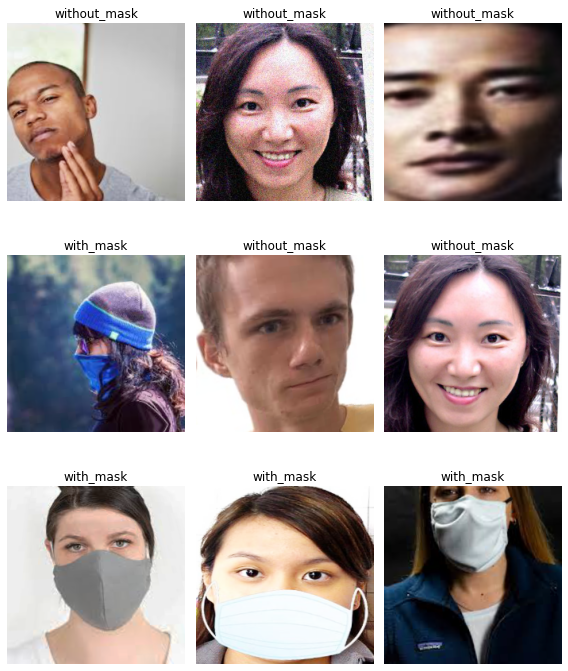

In [5]:
data.show_batch(rows= 3, figsize=(8, 10), recompute_scale_factor=True)

In [6]:
print(data.classes)
len(data.classes)
data.c

['with_mask', 'without_mask']


2

In [7]:
data

ImageDataBunch;

Train: LabelList (6043 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
with_mask,with_mask,with_mask,with_mask,with_mask
Path: /kaggle/input/face-mask-dataset/data;

Valid: LabelList (1510 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
with_mask,without_mask,without_mask,with_mask,without_mask
Path: /kaggle/input/face-mask-dataset/data;

Test: None

Perform transfer learning

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR finder

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


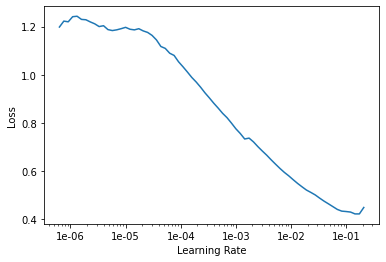

In [9]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [10]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4, slice(lr1, lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.208451,2.487489,0.884768,01:25
1,0.422423,0.173614,0.994040,01:20
2,0.129194,0.068041,0.997351,01:23
3,0.049964,0.065825,0.996689,01:22


In [11]:
lr = 1e-3
model1 = learn
model1.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.014845,0.066369,0.996689,01:26
1,0.030541,0.063135,0.997351,01:25
2,0.038955,0.063684,0.997351,01:25
3,0.032181,0.058922,0.997351,01:24
4,0.034234,0.057797,0.998013,01:28
5,0.018334,0.053961,0.997351,01:27
6,0.019686,0.049562,0.997351,01:30
7,0.025050,0.047681,0.996689,01:27
8,0.016803,0.049049,0.997351,01:30
9,0.026718,0.041924,0.997351,01:29


as you can see above, the accuracy didn't improve after 10th epoch.
so let's change the learning rate.

In [12]:
lr = 1e-1
learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.014294,0.039367,0.996689,01:31
1,0.074712,0.071817,0.995364,01:31
2,0.080588,0.158941,0.989404,01:31
3,0.211878,0.347152,0.975497,01:30
4,0.290310,0.194367,0.992053,01:31
5,0.381671,0.455929,0.978146,01:31
6,0.272496,0.158437,0.995364,01:31
7,0.221317,0.103233,0.996689,01:30
8,0.245817,0.639300,0.968874,01:31
9,0.165079,0.069436,0.996027,01:31


We have achieved 99.66% accuracy here. Yayy!!

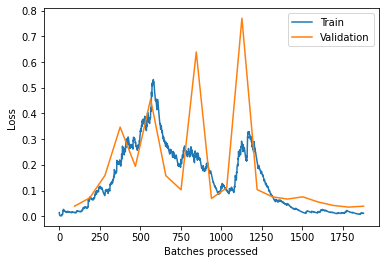

In [13]:
learn.recorder.plot_losses()

Plot confusion matrix

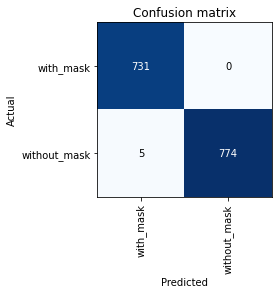

In [14]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

In [17]:
interpret.most_confused(min_val=2)

[('without_mask', 'with_mask', 5)]

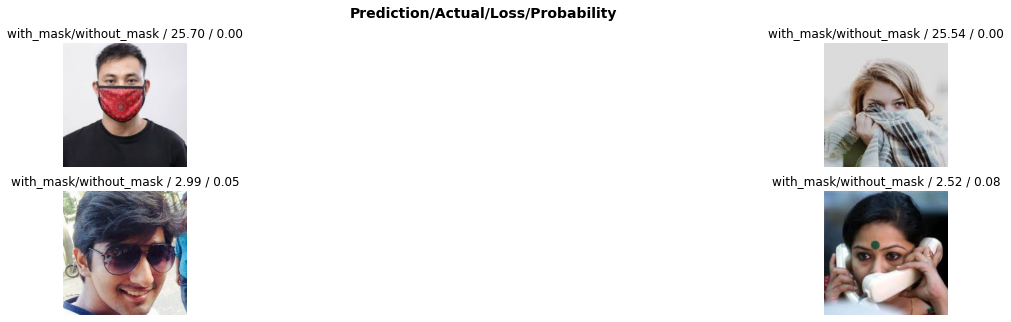

In [27]:
interpret.plot_top_losses(4, figsize = (25,5))

save and load the model

In [21]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')